# Crash Course Pandas 1
Im creating these series for people that have beginner/intermediate knowledge about pandas library.I m going to share my working notes(after tidying) to pass the info,nothing more. Certain codeblocks could get repetitive. Some info looks contradictory even though i have tried to remove most of them. Sorry for it beforehand. Also goodluck on your learning journey. This is my first kernel as well. Wish me luck. Contact me for any question, i will help you out if i can.

Contents:
* [Dataset](#1)
* [Missing Value Handling](#2)
* [Men or Women Speed More Often](#3)
* [Gender Effects on Who Gets Searched During Stop](#4)
* [Missing Values on Search Type Column](#5)
* [During Search, How Often Drivers Get Frisked](#6)
* [Which Year Had Least Number of Stops](#7)
* [How Does Drug Activity Change by Time of Day](#8)
* [Do Most Stops Occur at Night](#9)
* [Find the Bad Data in Stop Duration Column](#10)

<a id="1"></a> 
## Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ri = pd.read_csv("../input/police.csv")
ted = pd.read_csv("../input/ted.csv")

In [2]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [4]:
ri.shape

(91741, 15)

In [5]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

<a id="2"></a> 
## Missing Value Handling

In [6]:
#Never use inplace=True on the first time,check the output first then use inplace=True.Unless you are really sure about f()
ri.drop("county_name",axis=1,inplace=True)
#ri.drop("county_name",axis=columns,inplace=True)

In [7]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [9]:
#alternative value
ri.dropna(axis=1,how="all")
#ri.dropna(axis="columns",how="all")

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


<a id="3"></a> 
## Men or Women Speed More Often

In [10]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [11]:
#answer is "male"
ri[ri.violation=="Speeding"].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [12]:
#if u want percentage base result-normalize
ri[ri.violation=="Speeding"].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [13]:
ri[ri.driver_gender=="M"].violation_raw.value_counts(normalize=True)

Speeding                            0.524350
Other Traffic Violation             0.207012
Equipment/Inspection Violation      0.135671
Registration Violation              0.038461
Special Detail/Directed Patrol      0.037332
Seatbelt Violation                  0.036839
Call for Service                    0.013705
Violation of City/Town Ordinance    0.002623
Motorist Assist/Courtesy            0.002258
APB                                 0.000922
Suspicious Person                   0.000652
Warrant                             0.000175
Name: violation_raw, dtype: float64

In [14]:
ri[ri.driver_gender=="F"].violation_raw.value_counts(normalize=True)

Speeding                            0.658500
Other Traffic Violation             0.136277
Equipment/Inspection Violation      0.105780
Registration Violation              0.043086
Seatbelt Violation                  0.027009
Call for Service                    0.018545
Special Detail/Directed Patrol      0.004551
Motorist Assist/Courtesy            0.002595
Violation of City/Town Ordinance    0.001957
APB                                 0.000893
Suspicious Person                   0.000638
Warrant                             0.000170
Name: violation_raw, dtype: float64

In [15]:
#if we want see the result with 1 line of code in same df i would use groupby.
ri.groupby("driver_gender").violation_raw.value_counts(normalize=True)
#for every gender(for each gender) check violations and count them

driver_gender  violation_raw                   
F              Speeding                            0.658500
               Other Traffic Violation             0.136277
               Equipment/Inspection Violation      0.105780
               Registration Violation              0.043086
               Seatbelt Violation                  0.027009
               Call for Service                    0.018545
               Special Detail/Directed Patrol      0.004551
               Motorist Assist/Courtesy            0.002595
               Violation of City/Town Ordinance    0.001957
               APB                                 0.000893
               Suspicious Person                   0.000638
               Warrant                             0.000170
M              Speeding                            0.524350
               Other Traffic Violation             0.207012
               Equipment/Inspection Violation      0.135671
               Registration Violation              0

In [16]:
#this is series.which is vectors for R
type(ri.groupby("driver_gender").violation_raw.value_counts(normalize=True))

pandas.core.series.Series

In [17]:
#more in depth approach.
ri.groupby("driver_gender").violation_raw.value_counts(normalize=True).loc[:,"Speeding"]

driver_gender
F    0.65850
M    0.52435
Name: violation_raw, dtype: float64

In [18]:
#this data has multi index so unstack ll make it 1 index.lets try it
ri.groupby("driver_gender").violation_raw.value_counts(normalize=True).index

MultiIndex(levels=[['F', 'M'], ['APB', 'Call for Service', 'Equipment/Inspection Violation', 'Motorist Assist/Courtesy', 'Other Traffic Violation', 'Registration Violation', 'Seatbelt Violation', 'Special Detail/Directed Patrol', 'Speeding', 'Suspicious Person', 'Violation of City/Town Ordinance', 'Warrant']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [8, 4, 2, 5, 6, 1, 7, 3, 10, 0, 9, 11, 8, 4, 2, 5, 7, 6, 1, 10, 3, 0, 9, 11]],
           names=['driver_gender', 'violation_raw'])

In [19]:
#now your data becomes dataframe.
ri.groupby("driver_gender").violation_raw.value_counts(normalize=True).unstack()

violation_raw,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
driver_gender,,,,,,,,,,,,
F,0.000893,0.018545,0.105780,0.002595,0.136277,0.043086,0.027009,0.004551,0.65850,0.000638,0.001957,0.000170
M,0.000922,0.013705,0.135671,0.002258,0.207012,0.038461,0.036839,0.037332,0.52435,0.000652,0.002623,0.000175


<a id="4"></a> 
## Gender Effects on Who Gets Searched During Stop

In [20]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [21]:
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [22]:
#~%3 percent of people get searched.
ri.search_conducted.mean()
#91741*0.0348372047=3196 get searched.

0.03483720473942948

In [23]:
ri.shape

(91741, 14)

In [24]:
#value counts doesnt count nan values,however this col has no null values.
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [25]:
ri.groupby("driver_gender").search_conducted.mean()
#62895*0.043326=2725(M), 23511*0.020033=471(F) 2725+471=3196

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [26]:
ri.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [27]:
#which violation committed by which gender by what percentages (multiple groupby statements incoming)
ri.groupby(["violation","driver_gender"]).search_conducted.mean()
#now we can understand which gender commits which violation by what percentage.Some violations more prone to searched.
#not for every violation you get searched. pulled over by cop != getting searched.

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

<a id="5"></a> 
## Missing Values on Search Type Column

In [28]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [29]:
#why search_type is missing 88k times?
#bcs there is no search on in that pulled over cases.

In [30]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [31]:
#as we mentioned earlier value_counts doesnt count nan values.Total is 3196.
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [32]:
#why is this an empty series? not just an usual output (series with 88545 as a result)
ri[ri.search_conducted==False].search_type.value_counts()
#by default nan/na is dropped.so you python cant count them.WHEN s_c is False s_t is nan as u could guess.

Series([], Name: search_type, dtype: int64)

In [33]:
#if u dont want to drop nan values
ri[ri.search_conducted==False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [34]:
#if u want to see whole picture.
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Inventory,

<a id="6"></a> 
## During Search, How Often Drivers Get Frisked

In [35]:
#there are python built in string methods like upper() and there are pandas string methods which are much more broader.

In [36]:
#when search type has "protective frisk" in it.There are multiple search_type cases with protective frisk in it.
ri.search_type.str.contains("Protective Frisk")

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24       True
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
91711     NaN
91712     NaN
91713     NaN
91714     NaN
91715     NaN
91716     NaN
91717     NaN
91718     NaN
91719     NaN
91720     NaN
91721     NaN
91722     NaN
91723     NaN
91724     NaN
91725     NaN
91726     NaN
91727     NaN
91728     NaN
91729     NaN
91730     NaN
91731     NaN
91732     NaN
91733     NaN
91734     NaN
91735     NaN
91736     NaN
91737     NaN
91738     NaN
91739     NaN
91740     NaN
Name: search_type, Length: 91741, dtype: object

In [37]:
#this string method (contains) can be used with Series. bcs search_type is a series.
ri["frisk"]=ri.search_type.str.contains("Protective Frisk")

In [38]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [39]:
#mean() doesnt count nan values. 274/(274+2922)= ~0.086
ri.frisk.mean()

0.08573216520650813

<a id="7"></a> 
## Which Year Had Least Number of Stops

In [40]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [41]:
#lets take only year from our stop_date col.
ri.stop_date.str.slice(0,4)
#u get the years.

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
91711    2015
91712    2015
91713    2015
91714    2015
91715    2015
91716    2015
91717    2015
91718    2015
91719    2015
91720    2015
91721    2015
91722    2015
91723    2015
91724    2015
91725    2015
91726    2015
91727    2015
91728    2015
91729    2015
91730    2015
91731    2015
91732    2015
91733    2015
91734    2015
91735    2015
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [42]:
#lets do value_counts() to see the picture.
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [43]:
#alternative method-1
#combining 2 string cols first.
combined=ri.stop_date.str.cat(ri.stop_time,sep=" ")
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [44]:
ri["stop_datetime"]=pd.to_datetime(combined)
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [45]:
ri.stop_datetime.dt.year

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
91711    2015
91712    2015
91713    2015
91714    2015
91715    2015
91716    2015
91717    2015
91718    2015
91719    2015
91720    2015
91721    2015
91722    2015
91723    2015
91724    2015
91725    2015
91726    2015
91727    2015
91728    2015
91729    2015
91730    2015
91731    2015
91732    2015
91733    2015
91734    2015
91735    2015
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_datetime, Length: 91741, dtype: int64

In [46]:
#Alternative method-2
ri = pd.read_csv("../input/police.csv")
ri["year2"]=pd.to_datetime(stop_date)
ri.year2.dt.year
#is not working,to use date_time method your format must have date and time part,just date part isnt enough.Important to note

NameError: name 'stop_date' is not defined

In [47]:
ri = pd.read_csv("../input/police.csv")
combined=ri.stop_date.str.cat(ri.stop_time,sep=" ")
ri["stop_datetime"]=pd.to_datetime(combined)
ri.stop_datetime.dt.year.value_counts()
#auto descending order by default.

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [48]:
ri.stop_datetime.dt.year.value_counts().sort_values()
#auto ascending by default.

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

In [49]:
#result is series therefore u can use index[] attributes with it.
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

<a id="8"></a> 
## How Does Drug Activity Change by Time of Day

In [50]:
#lets find drug related stops.
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


In [51]:
ri.drugs_related_stop.mean()

0.008883705213590434

In [52]:
#for each hour what is the drug activity?
#ri.groupby("hour").drugs_related_stop.mean()
#this could work if we have a hour col.so lets create one or find a way to use hour from the cols.

In [53]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

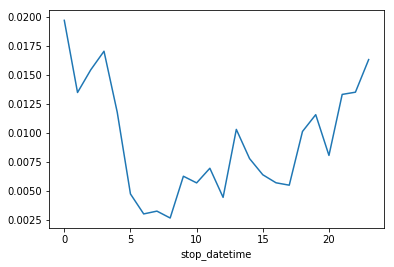

In [54]:
#lets plot it.Auto plot is lineplot.
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

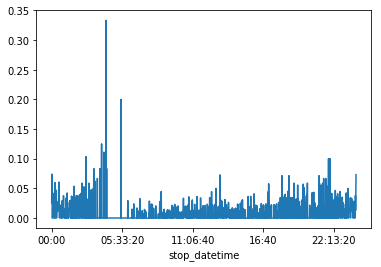

In [55]:
#harder to understand however its a different approach.
ri.groupby(ri.stop_datetime.dt.time).drugs_related_stop.mean().plot()

In [56]:
#other exploratory data codes.
#ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.value_counts().plot()
#ri.groupby(ri.stop_datetime.dt.time).drugs_related_stop.value_counts().plot()

<a id="9"></a> 
## Do Most Stops Occur at Night

In [57]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


In [58]:
#this is a series and series have 2 sorting methods. sort_index() and sort_values() they are ascending by default.
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

In [59]:
ri.stop_datetime.dt.hour.value_counts().sort_values()

5      210
4      254
3     1172
21    1499
18    2168
19    2587
17    2900
2     2975
6     3290
20    3340
22    3473
12    3582
16    3844
1     4442
7     4572
15    4832
13    4842
8     5210
0     5221
23    5629
14    5634
11    5877
9     6838
10    7350
Name: stop_datetime, dtype: int64

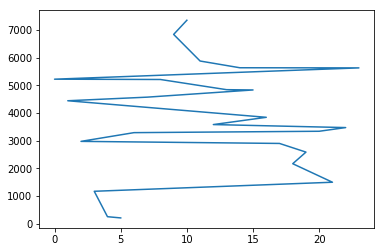

In [60]:
#problem is that indexes are not in order so plotting becomes very problematic.we need to use sort_index()
ri.stop_datetime.dt.hour.value_counts().sort_values().plot()

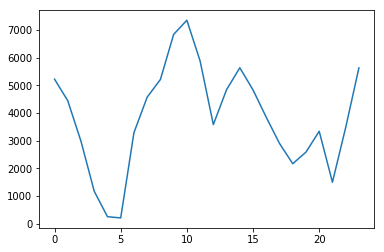

In [61]:
#now its ok
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [62]:
#different approach that doesnt have a plotting.
ri[(ri.stop_datetime.dt.hour>4)&(ri.stop_datetime.dt.hour<22)].shape

(68575, 16)

In [63]:
#if we consider night as btw 22-04 then ~23k of stops occurred on night 68k of stops occurred on day.
ri.shape

(91741, 16)

In [64]:
#another alternative.
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count()

stop_datetime
0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_date, dtype: int64

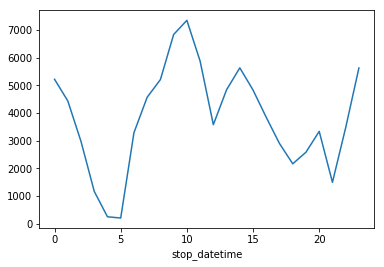

In [65]:
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

<a id="10"></a> 
## Find the Bad Data in Stop Duration Column

In [66]:
#what counts as bad data.
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


In [67]:
#what is the meaning of "fix it".And how can we fix it?
ri.stop_duration.value_counts(dropna=False)
#we can set 1 and 2 in this result as missing (nan). bcs stop_time is an str col using str.replace could be helpful...

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [68]:
ri.dtypes

stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object

In [69]:
#here is one way to solve it.
ri[(ri.stop_duration==1)|(ri.stop_duration==2)].stop_duration="NaN"
#But there are couple problems
#stop_duration col is string / "NaN" is string not a null. /

In [70]:
#this approach ll cause an SettingWithCopyWarning and couldnt handle the situation
ri[(ri.stop_duration=="1")|(ri.stop_duration=="2")].stop_duration="NaN"
ri.stop_duration.value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [71]:
#moving slowly but surely.
ri.loc[(ri.stop_duration=="1")|(ri.stop_duration=="2"),:]

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
55873,2012-01-23,11:17,NaN,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,2012-01-23 11:17:00
76624,2014-04-13,08:34,NaN,F,1965.0,49.0,White,Speeding,Speeding,False,NaN,Citation,False,1,False,2014-04-13 08:34:00


In [72]:
#string NaN isnt same as null nan. we need to import numpy library and use its nan attribute to handle this.
#but i intentionally cause a problem first then try to solve it.
ri.loc[(ri.stop_duration=="1")|(ri.stop_duration=="2"),"stop_duration"]="NaN"

In [73]:
#as u can see there are 2 NaN.one of them is string(latest one)
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [74]:
import numpy as np
ri.loc[ri.stop_duration=="NaN","stop_duration"]=np.nan

In [75]:
#thats it.
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64